<a href="https://colab.research.google.com/github/tusarrpatel/Collab/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import r_regression, SelectKBest
from numpy import set_printoptions
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_classif

In [2]:
windDS = pd.read_csv('/content/drive/MyDrive/training_data.csv')
#removing the zero active output
#windDS = masterDF[masterDF['active_power'] != 0]
#rslt_df.shape
windDS.head

<bound method NDFrame.head of         active_power            timestamp  pitch_angle  reactive_power  \
0          801.22998  2013-01-01 00:00:00        -1.00       67.559998   
1          943.16998  2013-01-01 00:10:00        -1.00       70.260002   
2          998.48999  2013-01-01 00:20:00        -1.00       75.330002   
3          837.96002  2013-01-01 00:30:00        -1.00       82.739998   
4          871.57001  2013-01-01 00:40:00        -1.00       82.349998   
...              ...                  ...          ...             ...   
208905       4.41000  2016-12-31 03:30:00         0.27        8.180000   
208906      -1.57000  2016-12-31 03:40:00         0.50        4.450000   
208907      -6.99000  2016-12-31 03:50:00         0.50        4.170000   
208908     -11.20000  2016-12-31 04:00:00         0.50        6.320000   
208909      -2.06000  2016-12-31 04:10:00         0.50        2.380000   

        nacelle_angle  nacelle_temp  wind_speed1  wind_speed2  wind_speed_avg  \


In [17]:
x = windDS[['wind_speed_avg', 'wind_speed2', 'wind_speed1','rotor_bearing_temp','pressure','outdoor_temp','rotor_angular_velocity','weather_temp','nacelle_temp'
,'humidity','nacelle_angle','wind_angle','weather_wind_speed','reactive_power','pitch_angle','weather_wind_angle']]
y = windDS['active_power']
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 1/7.0, random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(x_train)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(x_train)
test_img = scaler.transform(x_test)

Variance provided by PCA =  99.99999999999999


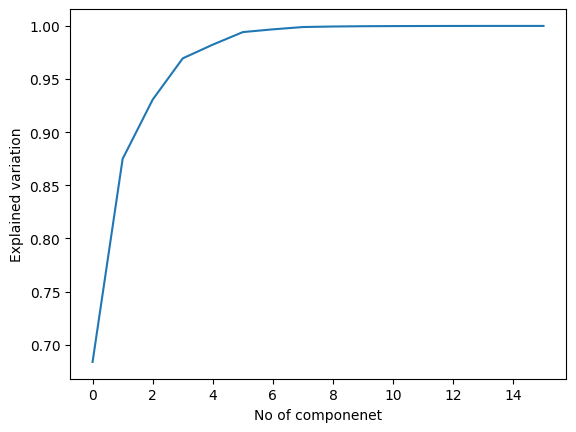

In [41]:
from sklearn.decomposition import PCA

# Make an instance of the Model
#pca = PCA(.95)

pca = PCA(n_components=16,random_state=2020)
pca.fit(x_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No of componenet")
plt.ylabel("Explained variation")

print("Variance provided by PCA = ",sum(pca.explained_variance_ratio_*100))
train_img = pca.transform(x_train)
test_img = pca.transform(x_test)

In [31]:
mlr = LinearRegression()
mlr.fit(train_img, y_train)

LinearRegression()

In [33]:
#Prediction of test set
y_pred_mlr= mlr.predict(test_img)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 285.61552813 1478.57283584  160.49945807 ...  -78.35683445  325.1308539
  311.70577975]


In [34]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
186813,188.280000,285.615528
45433,1790.060100,1478.572836
64742,97.010002,160.499458
151113,156.500000,228.054280
24054,0.000000,-245.101880


In [36]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
#print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 176.6143578708625
Mean Square Error: 47538.23166428547
Root Mean Square Error: 218.0326389884906
